# Import modules

In [9]:
#from keras.preprocessing.text import text_to_word_sequence
from plotly.express import histogram
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import math

# Open dataset

In [15]:
df = pd.read_csv('netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

### Info per atributte

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Name attributes

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Type

## plot type

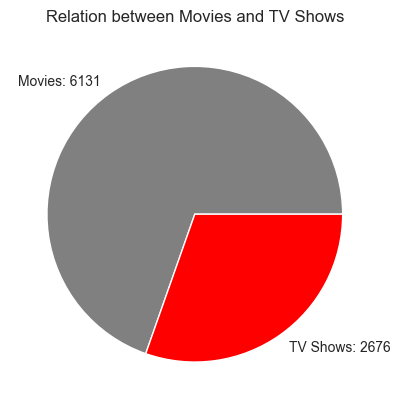

In [20]:
type_ = df['type'].value_counts()
plt.pie(type_,
        labels = ['Movies: ' + str(type_[0]),
                  'TV Shows: ' + str(type_[1])],
        colors = ['gray', 'red'])
plt.title('Relation between Movies and TV Shows')
plt.show()

## type distribution per country

In [ ]:
interest_countries = ['unitedstates', 'india', 'unitedkingdom', 'canada', 'france', 'japan', 'spain', 'mexico']

In [194]:
types, countries = [], []
for i in range(len(df['country'])):
    # if not str i.e. nan
    if not isinstance(df['country'][i], str):
        #print(0)
        pass
    else:
        #print(0)
        if ',' in df['country'][i]:
            l = len(df['country'][i].split(','))
            types.extend([df['type'][i]]*l)
            countries.extend(df['country'][i].split(','))
        else:
            #print(0)
            types.append(df['type'][i])
            countries.append(df['country'][i])
len(types), len(countries)

(10019, 10019)

In [195]:
df[['type','country']].head(10)

type                                            country
0    Movie                                       unitedstates
1  TV Show                                        southafrica
2  TV Show                                                NaN
3  TV Show                                                NaN
4  TV Show                                              india
5  TV Show                                                NaN
6    Movie                                                NaN
7    Movie  unitedstates,ghana,burkinafaso,unitedkingdom,g...
8  TV Show                                      unitedkingdom
9    Movie                                       unitedstates

In [196]:
df_types_countries = pd.DataFrame({'type' : types, 'country' : countries})
df_types_countries.head(10)

type        country
0    Movie   unitedstates
1  TV Show    southafrica
2  TV Show          india
3    Movie   unitedstates
4    Movie          ghana
5    Movie    burkinafaso
6    Movie  unitedkingdom
7    Movie        germany
8    Movie       ethiopia
9  TV Show  unitedkingdom

In [197]:
df_types_countries.groupby(['country', 'type']).size().reset_index(name='count')

country     type  count
0                   Movie      6
1                 TV Show      1
2    afghanistan    Movie      1
3        albania    Movie      1
4        algeria    Movie      3
..           ...      ...    ...
179    venezuela    Movie      4
180      vietnam    Movie      7
181  westgermany    Movie      3
182  westgermany  TV Show      2
183     zimbabwe    Movie      3

[184 rows x 3 columns]

In [198]:
interest_countries = ['unitedstates', 'india', 'unitedkingdom', 'canada', 'france', 'japan', 'spain', 'mexico']
df_types_countries_filtered = df_types_countries.query(("country in @interest_countries"))
df_grouped_type = df_types_countries_filtered.groupby(['country', 'type']).size().reset_index(name='count')
df_grouped_type

country     type  count
0          canada    Movie    319
1          canada  TV Show    126
2          france    Movie    303
3          france  TV Show     90
4           india    Movie    962
5           india  TV Show     84
6           japan    Movie    119
7           japan  TV Show    199
8          mexico    Movie    111
9          mexico  TV Show     58
10          spain    Movie    171
11          spain  TV Show     61
12  unitedkingdom    Movie    534
13  unitedkingdom  TV Show    272
14   unitedstates    Movie   2752
15   unitedstates  TV Show    938

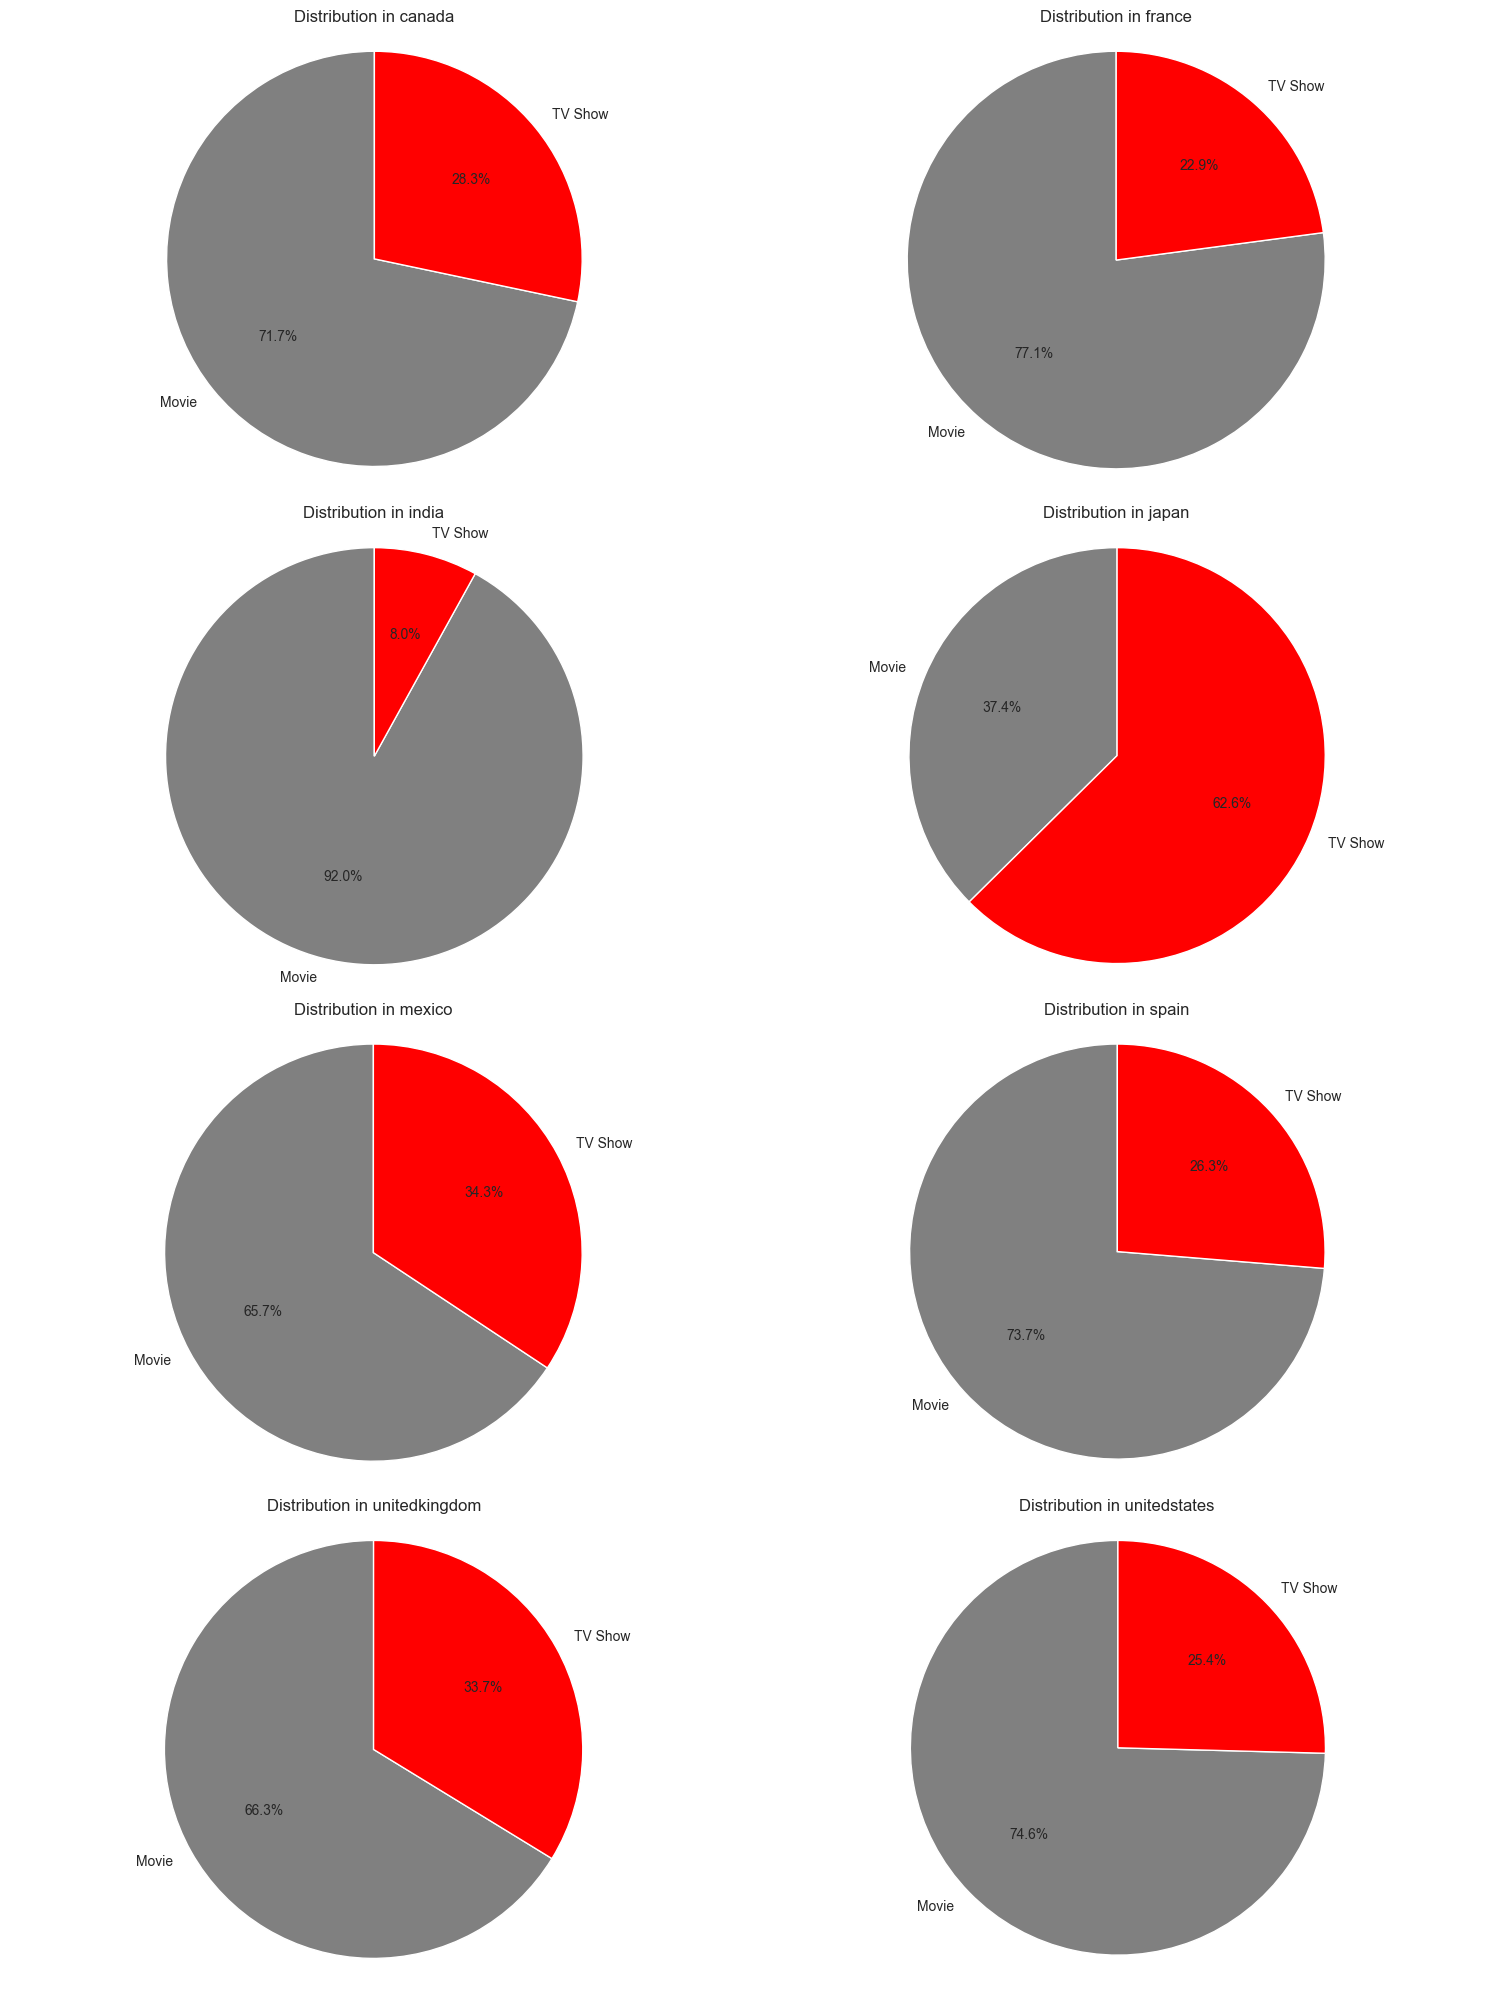

In [201]:
# Get unique countries
unique_countries = df_grouped_type['country'].unique()

num_rows = 4
num_cols = 2

# Create a grid of pie charts
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axis array for easy iteration
axs = axs.ravel()

for i, country in enumerate(unique_countries):
    if i < num_rows * num_cols:
        country_data = df_grouped_type[df_grouped_type['country'] == country]
        axs[i].pie(country_data['count'], labels=country_data['type'], autopct='%1.1f%%', startangle=90,
                    colors = ['gray', 'red'])
        axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        axs[i].set_title(f'Distribution in {country}')

# Hide remaining empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Director

In [22]:
#Displaying the top 15 directors, remember that this attribute is the one with most empty values 
director = df['director'].value_counts()
director.head(15)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: director, dtype: int64

## plot directors

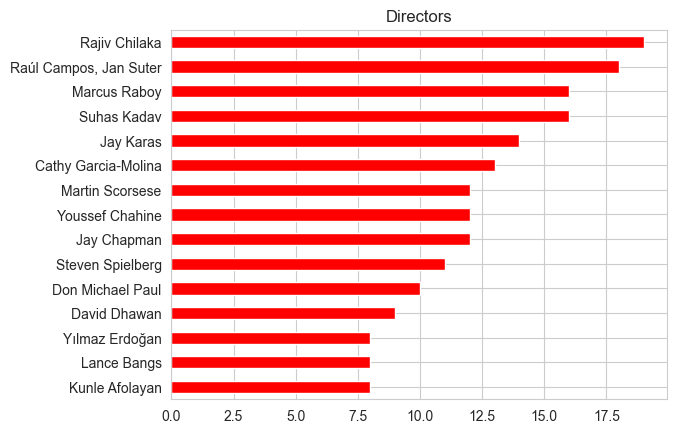

In [40]:
director[:15].plot(x = 'director', y = '', kind = 'barh', title='Directors', color = 'red').invert_yaxis()
plt.show()

# Cast

In [45]:
cast = df['cast']
cast[:5]

0                                                  NaN
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                  NaN
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
Name: cast, dtype: object

In [46]:
#There are several artist per Movie/TVShow, so we unpack them
cast = [c.split(',') for c in cast if isinstance(c, str)]
cast[:2]

[['Ama Qamata',
  ' Khosi Ngema',
  ' Gail Mabalane',
  ' Thabang Molaba',
  ' Dillon Windvogel',
  ' Natasha Thahane',
  ' Arno Greeff',
  ' Xolile Tshabalala',
  ' Getmore Sithole',
  ' Cindy Mahlangu',
  ' Ryle De Morny',
  ' Greteli Fincham',
  ' Sello Maake Ka-Ncube',
  ' Odwa Gwanya',
  ' Mekaila Mathys',
  ' Sandi Schultz',
  ' Duane Williams',
  ' Shamilla Miller',
  ' Patrick Mofokeng'],
 ['Sami Bouajila',
  ' Tracy Gotoas',
  ' Samuel Jouy',
  ' Nabiha Akkari',
  ' Sofia Lesaffre',
  ' Salim Kechiouche',
  ' Noureddine Farihi',
  ' Geert Van Rampelberg',
  ' Bakary Diombera']]

In [48]:
merged_cast = []
for c in cast:
  merged_cast.extend(c)
merged_cast[:5]

['Ama Qamata',
 ' Khosi Ngema',
 ' Gail Mabalane',
 ' Thabang Molaba',
 ' Dillon Windvogel']

## plot cast

In [62]:
from plotly.express import histogram

fig = histogram(merged_cast, color_discrete_sequence = ['red']).update_xaxes(categoryorder='total descending')
fig.update_layout(title = 'Cast Histogram')
fig.update_layout(title='Cast count', xaxis_title='Artist', yaxis_title='Count')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Cast per country

# Country

In [80]:
df['country'].value_counts()[:5]

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

In [93]:
df['country'] = df['country'].str.lower()
df['country'] = df['country'].replace(' ', '', regex=True)
df['country']

0       unitedstates
1        southafrica
2                NaN
3                NaN
4              india
            ...     
8802    unitedstates
8803             NaN
8804    unitedstates
8805    unitedstates
8806           india
Name: country, Length: 8807, dtype: object

In [94]:
country = df['country']
country = [c.split(',') for c in country if isinstance(c, str)]
country

[['unitedstates'],
 ['southafrica'],
 ['india'],
 ['unitedstates',
  'ghana',
  'burkinafaso',
  'unitedkingdom',
  'germany',
  'ethiopia'],
 ['unitedkingdom'],
 ['unitedstates'],
 ['germany', 'czechrepublic'],
 ['unitedstates'],
 ['mexico'],
 ['turkey'],
 ['india'],
 ['australia'],
 ['unitedstates'],
 ['unitedstates'],
 ['unitedstates', 'india', 'france'],
 ['unitedkingdom'],
 ['finland'],
 ['china', 'canada', 'unitedstates'],
 ['india'],
 ['unitedstates'],
 ['unitedstates'],
 ['unitedstates'],
 ['unitedstates'],
 ['unitedstates'],
 ['southafrica', 'unitedstates', 'japan'],
 ['unitedstates'],
 ['nigeria'],
 ['india'],
 ['japan'],
 ['japan'],
 ['japan'],
 ['japan'],
 ['unitedstates'],
 ['japan'],
 ['japan'],
 ['japan'],
 ['japan'],
 ['japan'],
 ['japan'],
 ['japan'],
 ['japan'],
 ['unitedkingdom'],
 ['india'],
 ['unitedstates'],
 ['india'],
 ['unitedkingdom'],
 ['nigeria'],
 ['japan'],
 ['unitedstates'],
 ['unitedstates'],
 ['nigeria'],
 ['spain', 'unitedstates'],
 ['france'],
 ['belg

In [95]:
countries = []
for c in country:
  countries.extend(c)
#for i in range(len(countries)):
#    countries[i] = countries[i].replace(' ', '')

In [96]:
len(df['country']), len(countries)

(8807, 10019)

In [97]:
counts_countries = Counter(countries)
counts_countries

Counter({'unitedstates': 3690,
         'southafrica': 62,
         'india': 1046,
         'ghana': 5,
         'burkinafaso': 1,
         'unitedkingdom': 806,
         'germany': 226,
         'ethiopia': 1,
         'czechrepublic': 22,
         'mexico': 169,
         'turkey': 113,
         'australia': 160,
         'france': 393,
         'finland': 11,
         'china': 162,
         'canada': 445,
         'japan': 318,
         'nigeria': 103,
         'spain': 232,
         'belgium': 90,
         'southkorea': 231,
         'singapore': 41,
         'italy': 100,
         'romania': 14,
         'argentina': 91,
         'venezuela': 4,
         'hongkong': 105,
         'russia': 27,
         '': 7,
         'ireland': 46,
         'nepal': 2,
         'newzealand': 33,
         'brazil': 97,
         'greece': 11,
         'jordan': 9,
         'colombia': 52,
         'switzerland': 19,
         'israel': 30,
         'taiwan': 89,
         'bulgaria': 10,
         'alg

In [98]:
counts_countries = dict(sorted(counts_countries.items(), key=lambda item: item[1], reverse=True))
counts_countries

{'unitedstates': 3690,
 'india': 1046,
 'unitedkingdom': 806,
 'canada': 445,
 'france': 393,
 'japan': 318,
 'spain': 232,
 'southkorea': 231,
 'germany': 226,
 'mexico': 169,
 'china': 162,
 'australia': 160,
 'egypt': 117,
 'turkey': 113,
 'hongkong': 105,
 'nigeria': 103,
 'italy': 100,
 'brazil': 97,
 'argentina': 91,
 'belgium': 90,
 'indonesia': 90,
 'taiwan': 89,
 'philippines': 83,
 'thailand': 70,
 'southafrica': 62,
 'colombia': 52,
 'netherlands': 50,
 'denmark': 48,
 'ireland': 46,
 'sweden': 42,
 'singapore': 41,
 'poland': 41,
 'unitedarabemirates': 37,
 'newzealand': 33,
 'lebanon': 31,
 'israel': 30,
 'norway': 30,
 'chile': 29,
 'russia': 27,
 'malaysia': 26,
 'pakistan': 24,
 'czechrepublic': 22,
 'switzerland': 19,
 'romania': 14,
 'uruguay': 14,
 'saudiarabia': 13,
 'austria': 12,
 'luxembourg': 12,
 'finland': 11,
 'greece': 11,
 'hungary': 11,
 'iceland': 11,
 'bulgaria': 10,
 'qatar': 10,
 'peru': 10,
 'jordan': 9,
 'kuwait': 8,
 '': 7,
 'vietnam': 7,
 'serbia':

## plot count countrys

In [99]:
import plotly.graph_objects as go

data = counts_countries

# Sort the dictionary by values in descending order
sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

# Extract the top 20 countries and their values
top_countries = [x[0] for x in sorted_data[:20]]
top_values = [x[1] for x in sorted_data[:20]]

fig = go.Figure([go.Bar(x=top_countries, y=top_values, marker = dict(color = 'red'))])

fig.update_layout(title='Number of Items per Country', xaxis_title='Country', yaxis_title='Number of Items')
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability

fig.show()


# Date added

In [21]:
date_added = df['date_added']
date_added = [c for c in date_added if isinstance(c, str)]

# Split each date string by comma and space, then take only the first part (month and year)
dates_without_day = [date.split(' ')[0] + date.split(',')[1][-5:] for date in date_added]

In [96]:
date = Counter(dates_without_day)
date

Counter({'September 2021': 183,
         'August 2021': 178,
         'July 2021': 257,
         'June 2021': 207,
         'May 2021': 132,
         'April 2021': 188,
         'March 2021': 112,
         'February 2021': 109,
         'January 2021': 132,
         'December 2020': 169,
         'November 2020': 154,
         'October 2020': 167,
         'September 2020': 168,
         'August 2020': 129,
         'July 2020': 146,
         'June 2020': 156,
         'May 2020': 157,
         'April 2020': 177,
         'March 2020': 137,
         'February 2020': 114,
         'January 2020': 204,
         'December 2019': 212,
         'November 2019': 253,
         'October 2019': 191,
         'September 2019': 122,
         'August 2019': 131,
         'July 2019': 155,
         'June 2019': 168,
         'May 2019': 139,
         'April 2019': 161,
         'March 2019': 171,
         'February 2019': 145,
         'January 2019': 151,
         'December 2018': 180,
         'N

## plot date added

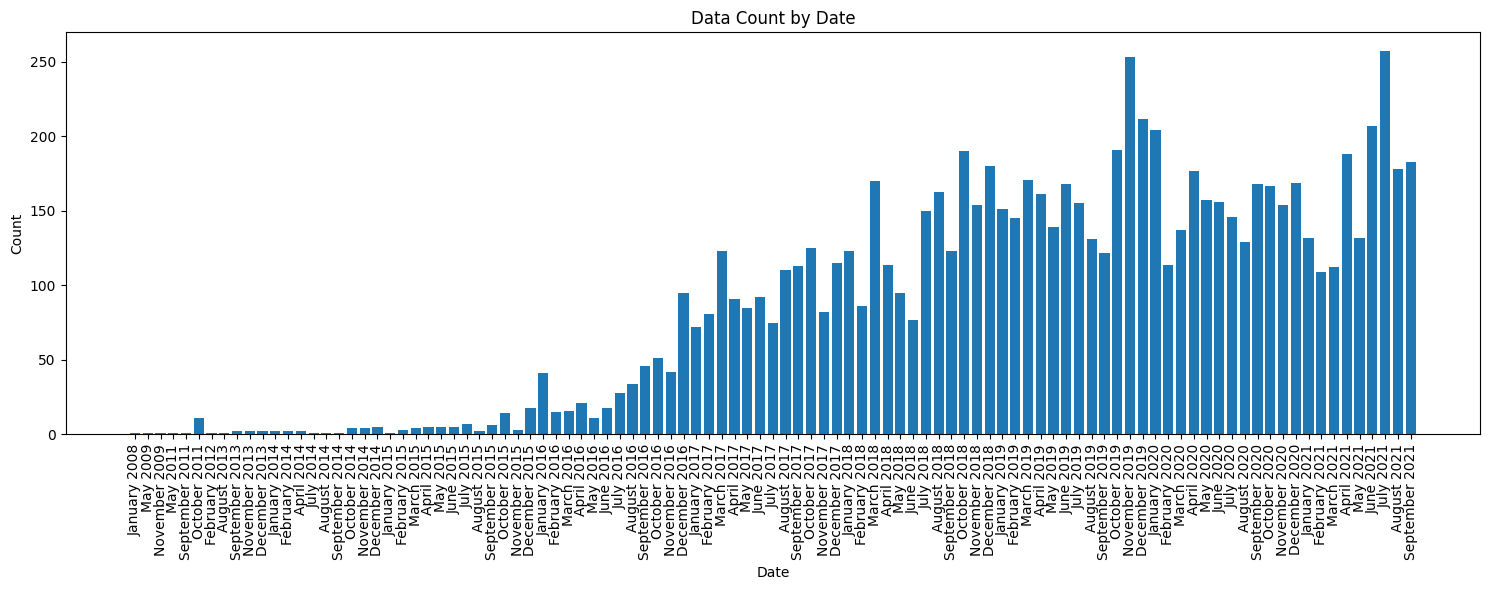

In [81]:
dates = list(date.keys())[:-15]
values = list(date.values())[:-15]

plt.figure(figsize=(15, 6))
plt.bar(dates[::-1], values[::-1])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Data Count by Date')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [105]:
list(enumerate(dates[::-1]))

[(0, 'January 2008'),
 (1, 'May 2009'),
 (2, 'November 2009'),
 (3, 'May 2011'),
 (4, 'September 2011'),
 (5, 'October 2011'),
 (6, 'February 2012'),
 (7, 'August 2013'),
 (8, 'September 2013'),
 (9, 'November 2013'),
 (10, 'December 2013'),
 (11, 'January 2014'),
 (12, 'February 2014'),
 (13, 'April 2014'),
 (14, 'July 2014'),
 (15, 'August 2014'),
 (16, 'September 2014'),
 (17, 'October 2014'),
 (18, 'November 2014'),
 (19, 'December 2014'),
 (20, 'January 2015'),
 (21, 'February 2015'),
 (22, 'March 2015'),
 (23, 'April 2015'),
 (24, 'May 2015'),
 (25, 'June 2015'),
 (26, 'July 2015'),
 (27, 'August 2015'),
 (28, 'September 2015'),
 (29, 'October 2015'),
 (30, 'November 2015'),
 (31, 'December 2015'),
 (32, 'January 2016'),
 (33, 'February 2016'),
 (34, 'March 2016'),
 (35, 'April 2016'),
 (36, 'May 2016'),
 (37, 'June 2016'),
 (38, 'July 2016'),
 (39, 'August 2016'),
 (40, 'September 2016'),
 (41, 'October 2016'),
 (42, 'November 2016'),
 (43, 'December 2016'),
 (44, 'January 2017'

In [88]:
'November 2015'[-4:]

'2015'

In [92]:
'November 2015'.split(' ')[1]

'2015'

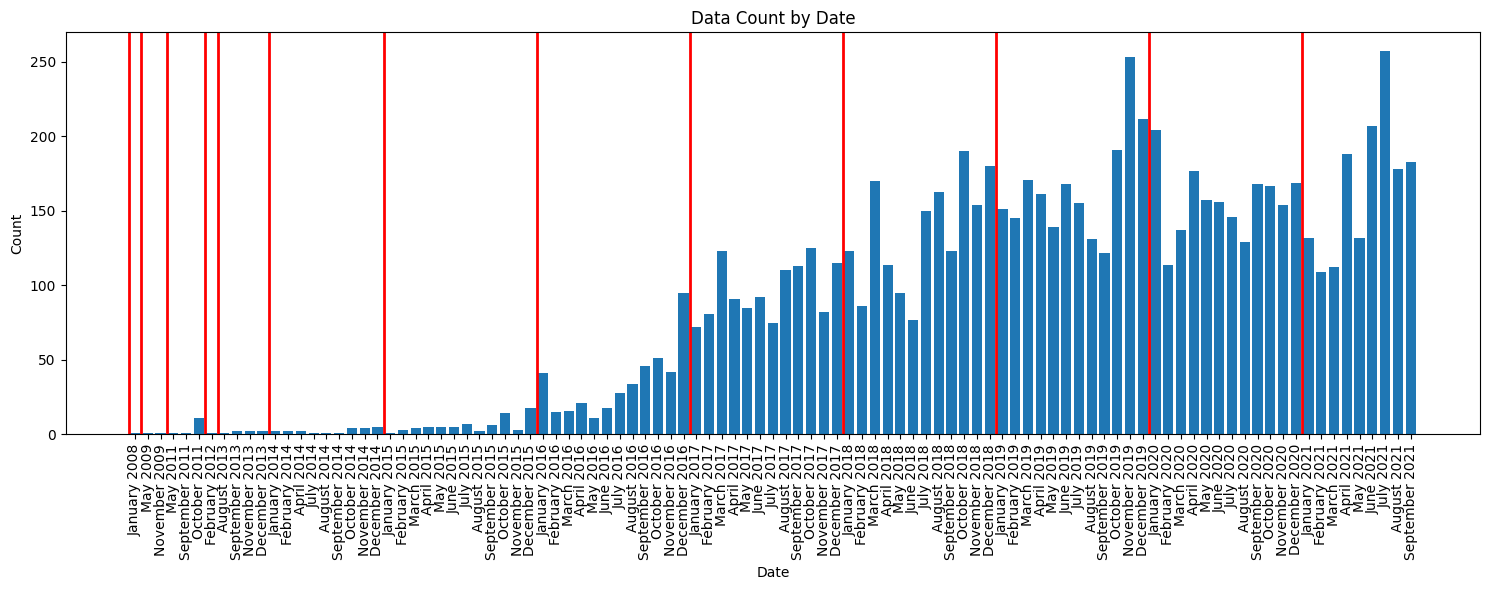

In [112]:
dates = list(date.keys())[:-15]
values = list(date.values())[:-15]

plt.figure(figsize=(15, 6))
plt.bar(dates[::-1], values[::-1])

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Data Count by Date')
plt.xticks(rotation=90)

# Adding division lines for each new year
prev_year = 2008
for i, Date in enumerate(dates[::-1]):
  year = Date.split(' ')[1]
  if year != prev_year:
    plt.axvline(x=i-.5, color='red', linestyle='-', linewidth=2)
    prev_year = year

plt.tight_layout()
plt.show()

## Date added per movie and TV Shows

In [128]:
date_added_Movies, date_added_TV_shows = [], []
for i in range(len(df)):
  if df['type'].iloc[i] == 'Movie' and isinstance(df['date_added'].iloc[i], str):
    try:
      date_added_Movies.append(df['date_added'].iloc[i].split(' ')[0] + df['date_added'].iloc[i].split(',')[1][-5:])
    except:
      pass
  elif df['type'].iloc[i] == 'TV Show' and isinstance(df['date_added'].iloc[i], str):
    try:
      date_added_TV_shows.append(df['date_added'].iloc[i].split(' ')[0] + df['date_added'].iloc[i].split(',')[1][-5:])
    except:
      pass

In [131]:
count_date_added_Movies, count_date_added_TV_shows = Counter(date_added_Movies), Counter(date_added_TV_shows)

## plot

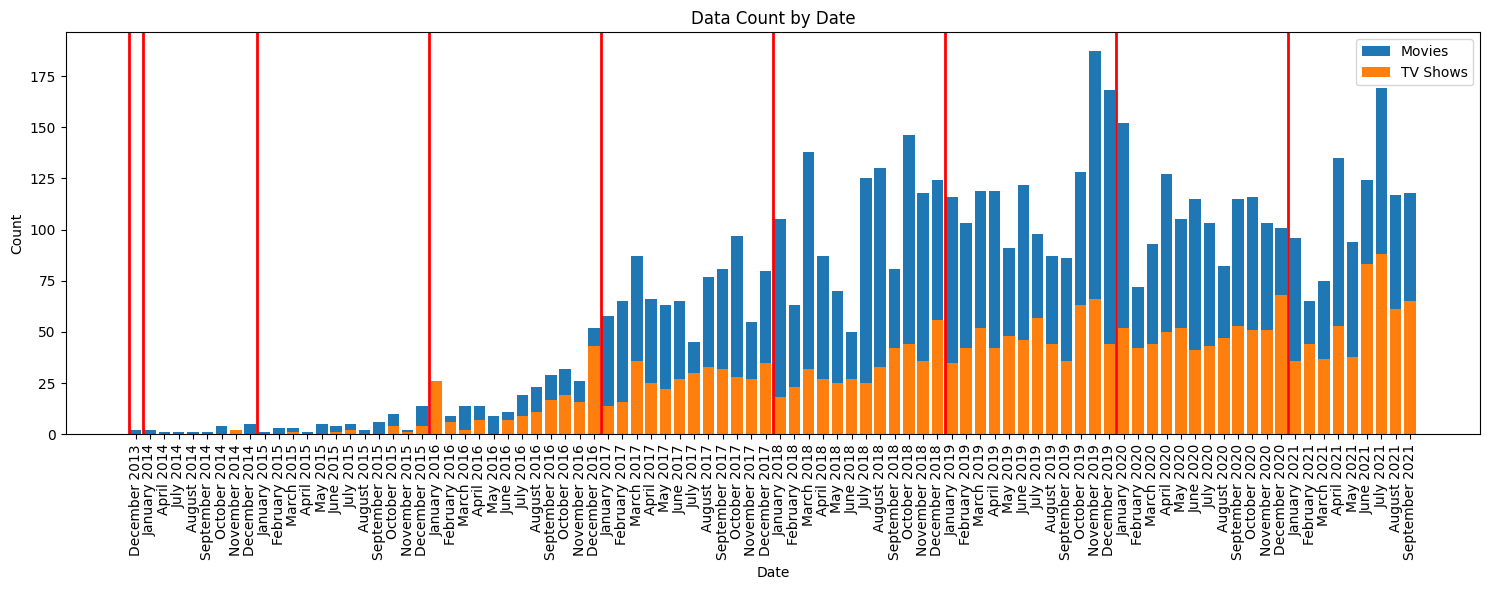

In [137]:
dates_movies = list(count_date_added_Movies.keys())[:-15]
values_movies = list(count_date_added_Movies.values())[:-15]
dates_TVShows = list(count_date_added_TV_shows.keys())[:-17]
values_TVShows = list(count_date_added_TV_shows.values())[:-17]

plt.figure(figsize=(15, 6))
plt.bar(dates_movies[::-1], values_movies[::-1], label = 'Movies')
plt.bar(dates_TVShows[::-1], values_TVShows[::-1], label = 'TV Shows')


plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Data Count by Date')
plt.xticks(rotation=90)

# Adding division lines for each new year
prev_year = 2008
for i, Date in enumerate(dates_movies[::-1]):
  year = Date.split(' ')[1]
  if year != prev_year:
    plt.axvline(x=i-.5, color='red', linestyle='-', linewidth=2)
    prev_year = year
plt.legend()
plt.tight_layout()
plt.show()

# Release_year

In [24]:
release_year = df['release_year']
release_year = Counter(release_year)
release_year

Counter({2020: 953,
         2021: 592,
         1993: 28,
         2018: 1147,
         1996: 24,
         1998: 36,
         1997: 38,
         2010: 194,
         2013: 288,
         2017: 1032,
         1975: 7,
         1978: 7,
         1983: 11,
         1987: 8,
         2012: 237,
         2001: 45,
         2014: 352,
         2002: 51,
         2003: 61,
         2004: 64,
         2011: 185,
         2008: 136,
         2009: 152,
         2007: 88,
         2005: 80,
         2006: 96,
         1994: 22,
         2015: 560,
         2019: 1030,
         2016: 902,
         1982: 17,
         1989: 16,
         1990: 22,
         1991: 17,
         1999: 39,
         1986: 13,
         1992: 23,
         1984: 12,
         1980: 11,
         1961: 1,
         2000: 37,
         1995: 25,
         1985: 10,
         1976: 9,
         1959: 1,
         1988: 18,
         1981: 13,
         1972: 5,
         1964: 2,
         1945: 4,
         1954: 2,
         1979: 11,
     

In [25]:
release_year = dict(sorted(release_year.items(), reverse=True))
release_year

{2021: 592,
 2020: 953,
 2019: 1030,
 2018: 1147,
 2017: 1032,
 2016: 902,
 2015: 560,
 2014: 352,
 2013: 288,
 2012: 237,
 2011: 185,
 2010: 194,
 2009: 152,
 2008: 136,
 2007: 88,
 2006: 96,
 2005: 80,
 2004: 64,
 2003: 61,
 2002: 51,
 2001: 45,
 2000: 37,
 1999: 39,
 1998: 36,
 1997: 38,
 1996: 24,
 1995: 25,
 1994: 22,
 1993: 28,
 1992: 23,
 1991: 17,
 1990: 22,
 1989: 16,
 1988: 18,
 1987: 8,
 1986: 13,
 1985: 10,
 1984: 12,
 1983: 11,
 1982: 17,
 1981: 13,
 1980: 11,
 1979: 11,
 1978: 7,
 1977: 7,
 1976: 9,
 1975: 7,
 1974: 7,
 1973: 10,
 1972: 5,
 1971: 5,
 1970: 2,
 1969: 2,
 1968: 3,
 1967: 5,
 1966: 1,
 1965: 2,
 1964: 2,
 1963: 2,
 1962: 3,
 1961: 1,
 1960: 4,
 1959: 1,
 1958: 3,
 1956: 2,
 1955: 3,
 1954: 2,
 1947: 1,
 1946: 2,
 1945: 4,
 1944: 3,
 1943: 3,
 1942: 2,
 1925: 1}

## plot release year

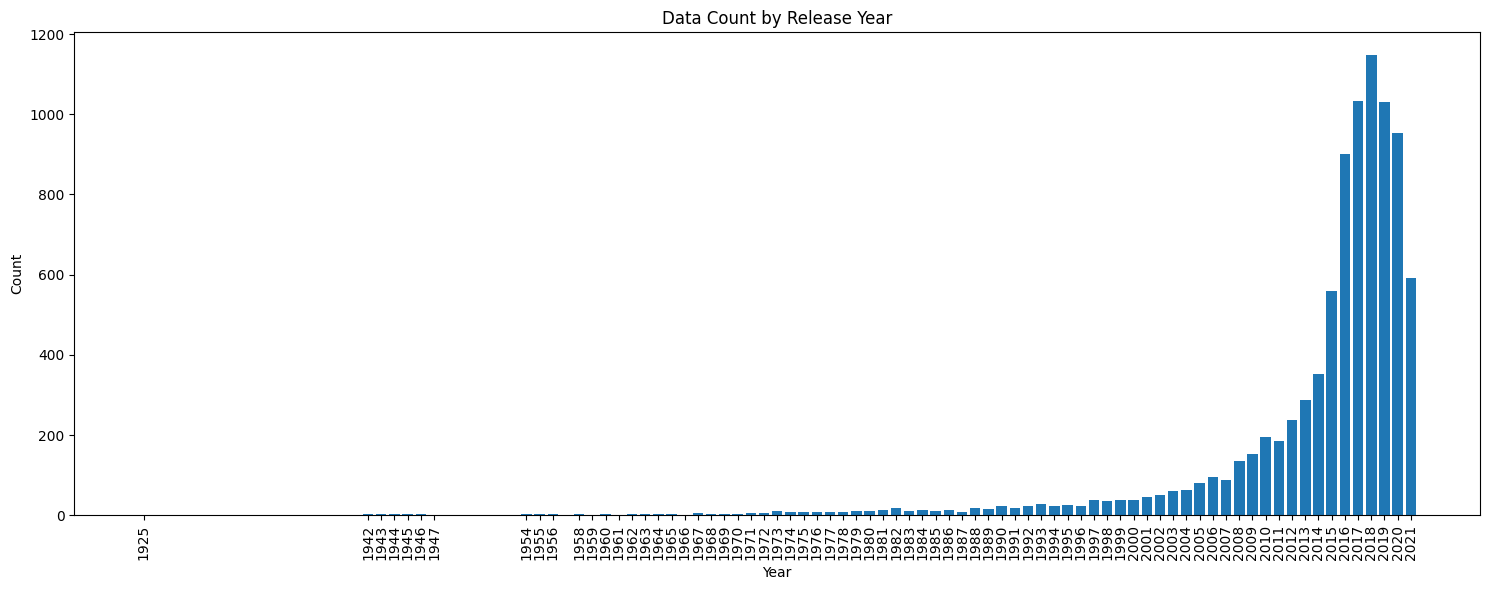

In [26]:
dates = list(release_year.keys())
values = list(release_year.values())

plt.figure(figsize=(15, 6))
plt.bar(dates[::-1], values[::-1])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Data Count by Release Year')
plt.xticks(dates, rotation=90)
#plt.xticks(range(0, 36, 1), rotation=90)
plt.tight_layout()
plt.show()

# rating (classification)

In [27]:
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [28]:
rating = df['rating'].value_counts()
rating

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [29]:
labels = [rating.index[i] +': ' + str(rating[i]) for i in range(len(rating))]
labels

['TV-MA: 3207',
 'TV-14: 2160',
 'TV-PG: 863',
 'R: 799',
 'PG-13: 490',
 'TV-Y7: 334',
 'TV-Y: 307',
 'PG: 287',
 'TV-G: 220',
 'NR: 80',
 'G: 41',
 'TV-Y7-FV: 6',
 'NC-17: 3',
 'UR: 3',
 '74 min: 1',
 '84 min: 1',
 '66 min: 1']

## plot rating (classificaction)

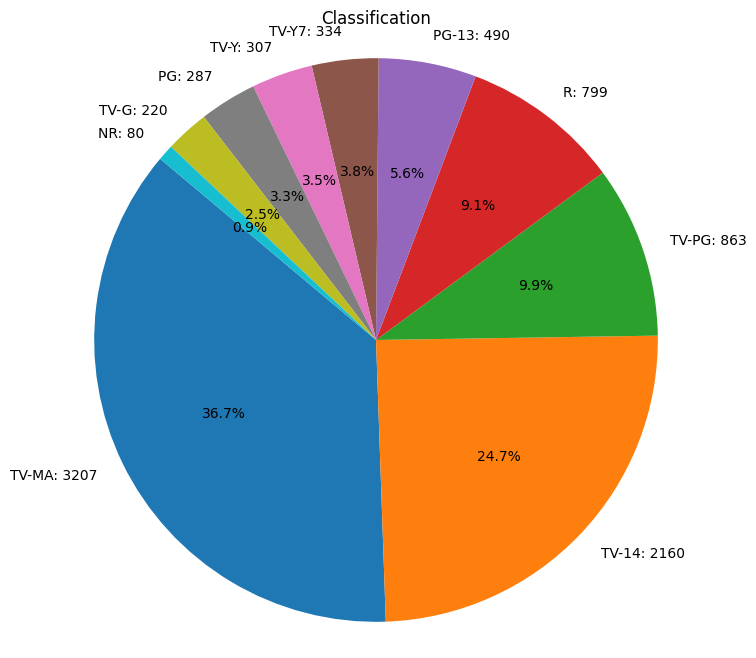

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(rating[:-7], labels=labels[:-7],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Classification')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Duration

In [31]:
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [154]:
duration_TV_shows = []
duration_movies = []

In [147]:
#df['duration'].iloc[0][:-4]
import re
re.search('(\d+)', df['duration'].iloc[0]).group(1)

'90'

In [148]:
df['duration'].iloc[1][:-8]
re.search('(\d+)', df['duration'].iloc[1]).group(1)

'2'

In [155]:
for i in range(len(df)):
  if df['type'].iloc[i] == 'Movie':
    try:
      duration_movies.append(int(re.search('(\d+)', df['duration'].iloc[i]).group(1)))
    except:
      pass
  elif df['type'].iloc[i] == 'TV Show':
    try:
      duration_TV_shows.append(int(re.search('(\d+)', df['duration'].iloc[i]).group(1)))
    except:
      pass

In [156]:
duration_TV_shows_counter = Counter(duration_TV_shows)
duration_TV_shows_counter

Counter({2: 425,
         1: 1793,
         9: 9,
         4: 95,
         5: 65,
         3: 199,
         6: 33,
         7: 23,
         10: 7,
         8: 17,
         17: 1,
         13: 3,
         15: 2,
         12: 2,
         11: 2})

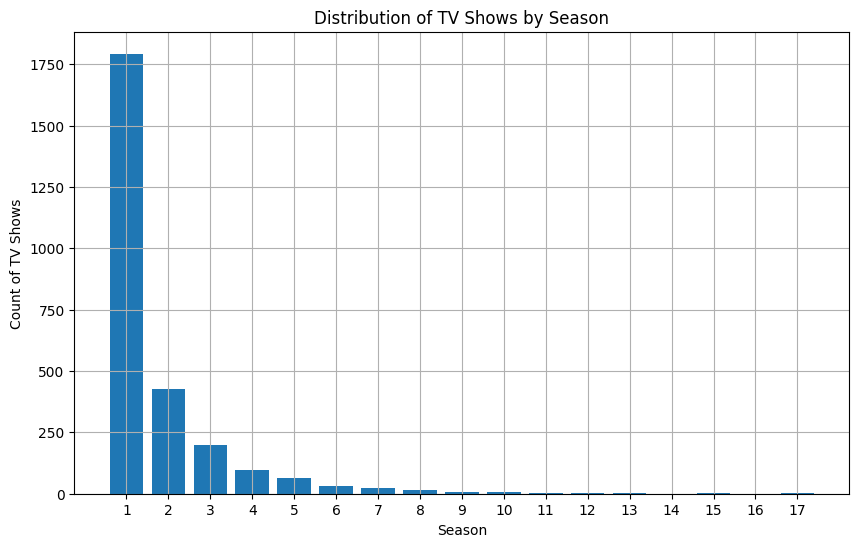

In [194]:
import matplotlib.pyplot as plt

data = duration_TV_shows_counter

# Create a list of counts for each season (filling in zeros for missing data)
counts = [data.get(season, 0) for season in range(1, 18)]

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(range(1, 18), counts)
plt.xlabel('Season')
plt.ylabel('Count of TV Shows')
plt.title('Distribution of TV Shows by Season')
plt.grid(True)
plt.xticks(range(1, 18))
plt.show()


In [ ]:
duration_movies_counter = Counter(duration_movies)
duration_movies_counter

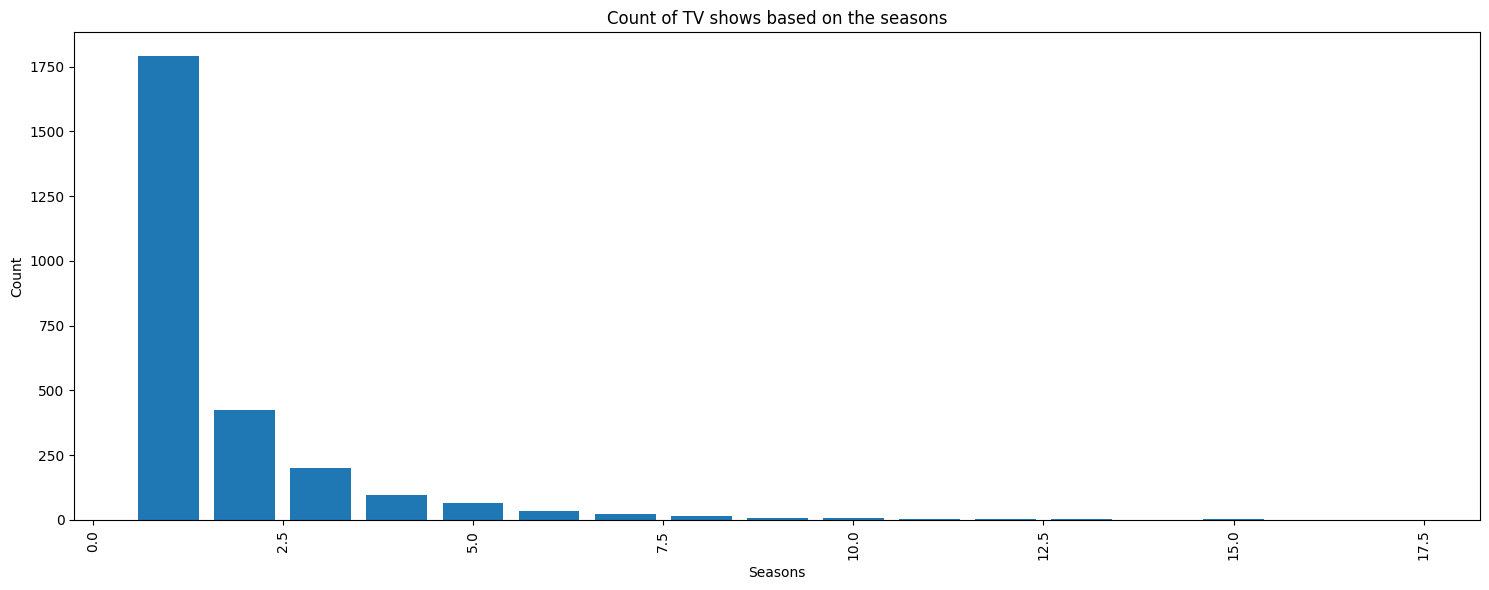

In [158]:
dates = list(duration_TV_shows_counter.keys())
values = list(duration_TV_shows_counter.values())

plt.figure(figsize=(15, 6))
plt.bar(dates, values)
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Count of TV shows based on the seasons')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

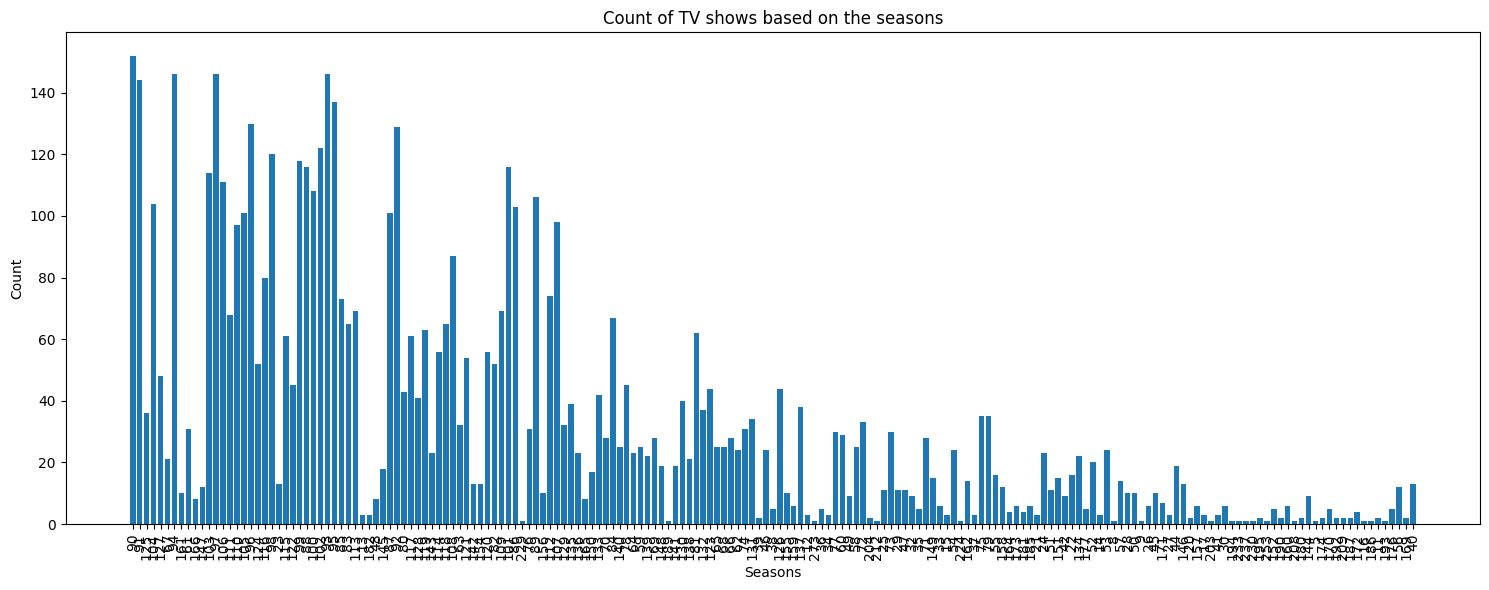

In [39]:
dates = list(duration_movies_counter.keys())[:-20]
values = list(duration_movies_counter.values())[:-20]

plt.figure(figsize=(15, 6))
plt.bar(dates, values)
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Count of TV shows based on the seasons')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [40]:
duration_movies_sorted = dict(sorted(duration_movies.items()))
duration_movies_sorted

AttributeError: 'list' object has no attribute 'items'

In [ ]:
duration_movies

In [ ]:
dict(sorted(duration_movies_counter.items()))

In [43]:
duration_movies = [int(x) for x in duration_movies]
duration_TV_shows = [int(x) for x in duration_TV_shows if x != '']

In [ ]:
duration_TV_shows

## plot duration movies

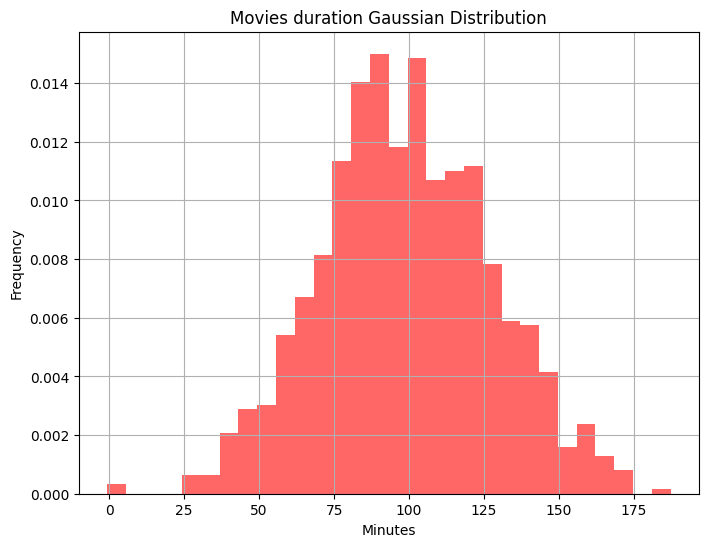

In [159]:
data = duration_movies

# Calculate mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data)

# Generate random samples from a Gaussian distribution
gaussian_samples = np.random.normal(mean, std_dev, 1000)

# Plotting the Gaussian distribution
plt.figure(figsize=(8, 6))
plt.hist(gaussian_samples, bins=30, density=True, alpha=0.6, color='r')
plt.title('Movies duration Gaussian Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## plot duration tv shows

In [140]:
duration_TV_shows.sort()

In [143]:
len(duration_TV_shows)

883

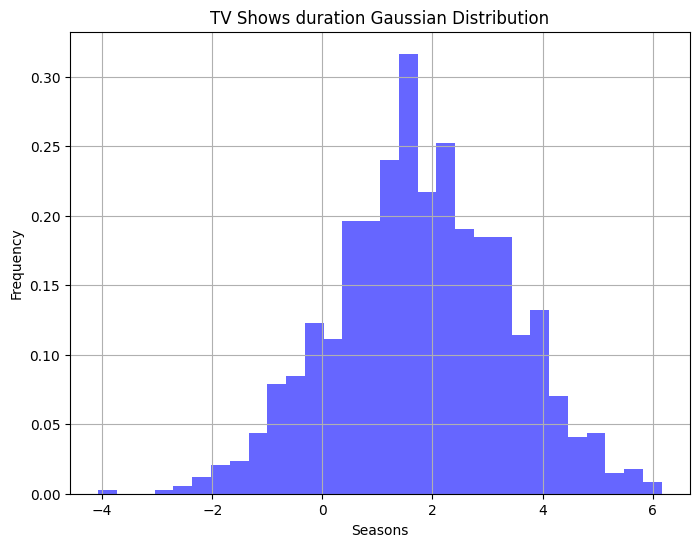

In [164]:
data = duration_TV_shows

# Calculate mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data)

# Generate random samples from a Gaussian distribution
gaussian_samples = np.random.normal(mean, std_dev, 1000)

# Plotting the Gaussian distribution
plt.figure(figsize=(8, 6))
plt.hist(gaussian_samples, bins=30, density=True, alpha=0.6, color='b')
plt.title('TV Shows duration Gaussian Distribution')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [162]:
import plotly.graph_objs as go
import numpy as np

# Example array of data
data_array = duration_TV_shows

# Create histogram
histogram = go.Histogram(x=data_array, histnorm='probability')

# Create layout
layout = go.Layout(
    title='Gaussian Distribution',
    xaxis=dict(title='Value'),
    yaxis=dict(title='Probability')
)

# Create figure
fig = go.Figure(data=[histogram], layout=layout)

# Show plot
fig.show()


In [171]:
seasons

[2, 1, 9, 4, 5, 3, 6, 7, 10, 8, 17, 13, 15, 12, 11]

In [172]:
counts

[425, 1793, 9, 95, 65, 199, 33, 23, 7, 17, 1, 3, 2, 2, 2]

In [178]:
list(range(min(seasons), max(seasons)+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [184]:
import plotly.graph_objs as go

data = Counter(duration_TV_shows)

# Create a list of all seasons
all_seasons = list(range(1, max(data.keys()) + 1))

# Create a list of counts for all seasons, filling in 0 for missing data
counts = [data.get(season, 0) for season in all_seasons]

# Create bar chart
bar_chart = go.Bar(x=all_seasons, y=counts)

# Create layout
layout = go.Layout(
    title='TV Shows by Season',
    #xaxis=dict(title='Season', tickmode='array', tickvals=all_seasons),
    xaxis=dict(title='Season', tickmode='array', tickvals=all_seasons, tickangle=-90),
    yaxis=dict(title='Number of TV Shows')
)

# Create figure
fig = go.Figure(data=[bar_chart], layout=layout)

# Show plot
fig.show()

In [195]:
data = Counter(duration_movies)

# Create a list of all seasons
all_seasons = list(range(1, max(data.keys()) + 1))

# Create a list of counts for all seasons, filling in 0 for missing data
counts = [data.get(season, 0) for season in all_seasons]

# Create bar chart
bar_chart = go.Bar(x=all_seasons, y=counts)

# Create layout
layout = go.Layout(
    title='Movies duration in minutes',
    #xaxis=dict(title='Season', tickmode='array', tickvals=all_seasons),
    xaxis=dict(title='Minutes', tickmode='array', tickvals=all_seasons, tickangle=-90, tickfont=dict(size=5)),
    yaxis=dict(title='Movies')
)

# Create figure
fig = go.Figure(data=[bar_chart], layout=layout)

# Show plot
fig.show()

In [161]:
import plotly.graph_objects as go

# Sample data
data = duration_TV_shows

# Create histogram
fig = go.Figure(data=[go.Histogram(x=data)])

# Update layout
fig.update_layout(
    title="Histogram",
    xaxis_title="Value",
    yaxis_title="Frequency"
)

# Show plot
fig.show()


# listed_in (category)

In [46]:
category = df['listed_in']
category

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [47]:
category = [c.split(', ') for c in category if isinstance(c, str)]
category[:2]

[['Documentaries'], ['International TV Shows', 'TV Dramas', 'TV Mysteries']]

In [48]:
total_category = []
for c in category:
  total_category.extend(c)
total_category[:28]

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Crime TV Shows',
 'International TV Shows']

In [ ]:
sorted(Counter(total_category).items(), key=lambda x: x[1], reverse=True)

In [ ]:
total_category = [elem.replace(' ', '') for elem in total_category]
total_category

In [78]:
counts_category = sorted(Counter(total_category).items(), key=lambda x: x[1], reverse=True)
counts_category

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('InternationalTVShows', 1351),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('TVDramas', 763),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('TVComedies', 581),
 ('Thrillers', 577),
 ('CrimeTVShows', 470),
 ("Kids'TV", 451),
 ('Docuseries', 395),
 ('Music&Musicals', 375),
 ('RomanticTVShows', 370),
 ('HorrorMovies', 357),
 ('Stand-UpComedy', 343),
 ('RealityTV', 255),
 ('BritishTVShows', 253),
 ('Sci-Fi&Fantasy', 243),
 ('SportsMovies', 219),
 ('AnimeSeries', 176),
 ('Spanish-LanguageTVShows', 174),
 ('TVAction&Adventure', 168),
 ('KoreanTVShows', 151),
 ('ClassicMovies', 116),
 ('LGBTQMovies', 102),
 ('TVMysteries', 98),
 ('Science&NatureTV', 92),
 ('TVSci-Fi&Fantasy', 84),
 ('TVHorror', 75),
 ('AnimeFeatures', 71),
 ('CultMovies', 71),
 ('TeenTVShows', 69),
 ('Faith&Spirituality', 65),
 ('TVThrillers', 57),
 ('Movies', 57),
 ('Stand-UpComedy&TalkShows', 56),


## Wordcloud plot

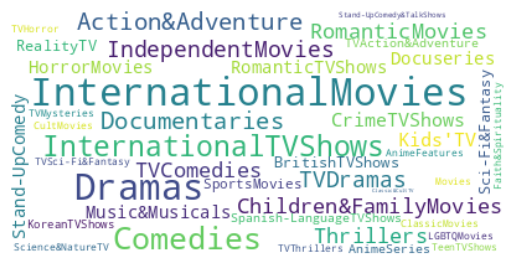

In [77]:
word_list = total_category

# Join the words into a single string separated by spaces
text = ' '.join(word_list)

# Generate a word cloud
wordcloud = WordCloud(background_color='white', max_words  = 42).generate_from_frequencies(Counter(total_category))

# Display the word cloud using matplotlib
plt.figure()#figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()